## 데이터셋 다운로드

In [1]:
# YOLO v5 PyTorch 다운로드
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 15814 (delta 10), reused 26 (delta 10), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (10822/10822), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.9/605.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [2]:
# 이미지 데이터 다운로드
!git clone https://github.com/Ottug-i/Curry_Data

Cloning into 'Curry_Data'...
remote: Enumerating objects: 48953, done.
remote: Counting objects: 100% (5815/5815), done.
remote: Compressing objects: 100% (2688/2688), done.
remote: Total 48953 (delta 49), reused 3916 (delta 49), pack-reused 43138
Receiving objects: 100% (48953/48953), 1.01 GiB | 18.24 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (44535/44535), done.


In [3]:
# train, valid 경로 정보 및 레이블 (클래스) 확인
%cat /content/yolov5/Curry_Data/object_detection/data.yaml


train: ../dataset/train/images
test: ../dataset/test/images
val: ../dataset/valid/images

nc: 111
names: ['��ġĵ', '���', 'ī��', '����', '����', '��', '�߰�����', '�Ұ���', '����', '��������', '����', '���', '�ٳ���', '����', '������', 'ũ������', '������', '����', '����', '�丶��', '����', 'ü��', '����', '����', '�����', '����', '������ī', '���', '������', '����', '����', '����', '����', '����', '����', '��', '�ñ�ġ', '������', '������', '����ݸ�', '��ȣ��', '��ȣ��', '����', '��ġ', '����', '�Ľ���', '�ᳪ��', '�ƺ�ī��', '�����̹���', '��Ÿ������', '����', '���̹���', 'ǥ������', '����̹���', '���̹���', 'û��ä', '���縮', '��', '����', '����', '������', '�ػ�', '����', 'ȫ��', '��ġ', '�ٽø�', '����', '�����', '��', '����', '��ġ', '��¡��', '����', '�ʰ�����', '������', '���ڶ�', '�Ŀ���', '����', '����', '�ް�', '�����ް�', '�ҽ���', '������', '����', 'ġ��', '����', '����', '�κ�', '�ҹ�', '�Ľ�Ÿ��', '����', '��', '�Ƹ��', 'ȣ��', '�Ļ�', '�ٰ�Ʈ', 'ũ�οͻ�', '����', '������', '��', '�������', '��', '��ġ', '����', '������', '

In [4]:
# 파일의 문장을 텍스트처럼 이용하기 위해 함수 생성
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [5]:
%pwd

'/content/yolov5'

In [6]:
# 폴더에 맞게 경로 변경
%%writetemplate /content/yolov5/Curry_Data/object_detection/data.yaml

train: ./Curry_Data/object_detection/train/images
test: ./Curry_Data/object_detection/test/images
val: ./Curry_Data/object_detection/valid/images

nc: 111
names: ['참치캔', '라면', '카레', '소주', '맥주', '닭', '닭가슴살', '소고기', '돼지', '오리고기', '삼겹살', '사과', '바나나', '레몬', '오렌지', '크랜베리', '복숭아', '포도', '망고', '토마토', '딸기', '체리', '수박', '석류', '양배추', '고추', '파프리카', '당근', '옥수수', '오이', '마늘', '생강', '상추', '양파', '감자', '무', '시금치', '고구마', '샐러리', '브로콜리', '애호박', '단호박', '대파', '김치', '연근', '파슬리', '콩나물', '아보카도', '새송이버섯', '느타리버섯', '배추', '팽이버섯', '표고버섯', '양송이버섯', '목이버섯', '청경채', '고사리', '굴', '연어', '문어', '가리비', '해삼', '새우', '홍합', '갈치', '다시마', '꼬막', '고등어', '게', '전복', '참치', '오징어', '맛살', '초고추장', '땅콩잼', '누텔라', '식용유', '식초', '후추', '달걀', '삶은달걀', '소시지', '베이컨', '버터', '치즈', '우유', '만두', '두부', '쌀밥', '파스타면', '국수', '밤', '아몬드', '호두', '식빵', '바게트', '크로와상', '와플', '고추장', '빵', '마요네즈', '김', '멸치', '생강', '베이컨', '박력분', '양배추', '깻잎', '머스터드', '된장', '부추']

In [7]:
%cat /content/yolov5/Curry_Data/object_detection/data.yaml


train: ./Curry_Data/object_detection/train/images
test: ./Curry_Data/object_detection/test/images
val: ./Curry_Data/object_detection/valid/images

nc: 111
names: ['참치캔', '라면', '카레', '소주', '맥주', '닭', '닭가슴살', '소고기', '돼지', '오리고기', '삼겹살', '사과', '바나나', '레몬', '오렌지', '크랜베리', '복숭아', '포도', '망고', '토마토', '딸기', '체리', '수박', '석류', '양배추', '고추', '파프리카', '당근', '옥수수', '오이', '마늘', '생강', '상추', '양파', '감자', '무', '시금치', '고구마', '샐러리', '브로콜리', '애호박', '단호박', '대파', '김치', '연근', '파슬리', '콩나물', '아보카도', '새송이버섯', '느타리버섯', '배추', '팽이버섯', '표고버섯', '양송이버섯', '목이버섯', '청경채', '고사리', '굴', '연어', '문어', '가리비', '해삼', '새우', '홍합', '갈치', '다시마', '꼬막', '고등어', '게', '전복', '참치', '오징어', '맛살', '초고추장', '땅콩잼', '누텔라', '식용유', '식초', '후추', '달걀', '삶은달걀', '소시지', '베이컨', '버터', '치즈', '우유', '만두', '두부', '쌀밥', '파스타면', '국수', '밤', '아몬드', '호두', '식빵', '바게트', '크로와상', '와플', '고추장', '빵', '마요네즈', '김', '멸치', '생강', '베이컨', '박력분', '양배추', '깻잎', '머스터드', '된장', '부추']


## 모델 구성

In [8]:
import yaml

# 데이터에서 클래스 수 가져오기
with open('/content/yolov5/Curry_Data/object_detection/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

# 80개의 클래스
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [9]:
# 클래스 수(80 -> 111)를 늘려서 새롭게 모델 정의
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [10]:
# nc가 111이 됨
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 111  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, 

## 학습

In [12]:
%cd /content/yolov5

# 학습
!python train.py --img 640 --batch 16 --epochs 3 --data /content/yolov5/Curry_Data/object_detection/data.yaml --cfg ./models/custom_yolov5s.yaml --weight '' --name ingredients_results --cache

/content/yolov5
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/yolov5/Curry_Data/object_detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=ingredients_result

## 검증

In [14]:
# 학습 수행이 된 결과 중 가장 수치가 좋았던 가중치 파일 모델을 이용해 검증 수행 (검증 데이터에 대해 수행)
!python val.py --weights runs/train/ingredients_results2/weights/best.pt --data /content/yolov5/Curry_Data/object_detection/data.yaml --img 640 --iou 0.65 --half

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=/content/yolov5/Curry_Data/object_detection/data.yaml, weights=['runs/train/ingredients_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.6 torch-2.0.1+cu118 C

In [15]:
# 학습 수행이 된 결과 중 가장 수치가 좋았던 가중치 파일 모델을 이용해 테스트 수행 (테스트 데이터에 대해 수행)
!python val.py --weights runs/train/ingredients_results2/weights/best.pt --data /content/yolov5/Curry_Data/object_detection/data.yaml --img 640 --task test

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=/content/yolov5/Curry_Data/object_detection/data.yaml, weights=['runs/train/ingredients_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.6 torch-2.0.1+cu118 

## 추론

In [18]:
%ls runs/train/ingredients_results2/weights

best.pt  last.pt


In [19]:
# 테스트 이미지에 대해서 가장 수치가 좋았던 가중치 모델로 추론
!python detect.py --weights runs/train/ingredients_results2/weights/best.pt --img 640 --conf 0.4 --source ./Curry_Data/object_detection/test/images

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['runs/train/ingredients_results2/weights/best.pt'], source=./Curry_Data/object_detection/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=F

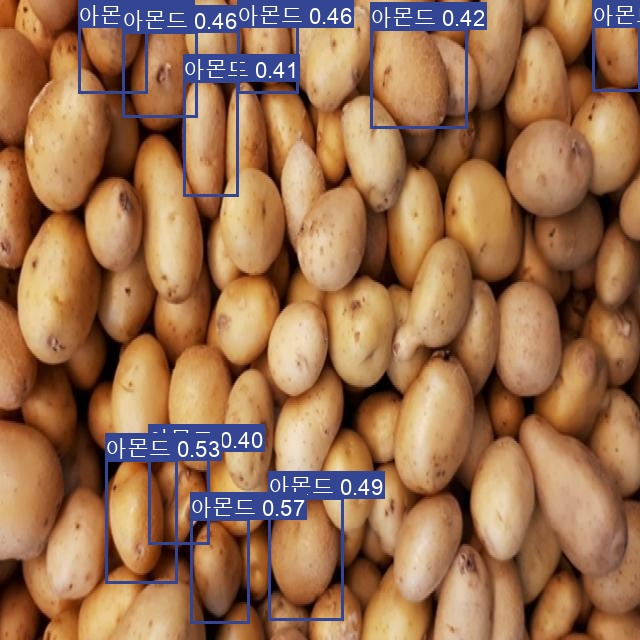

In [21]:
# 랜덤으로 추론 확인 (실행마다 랜덤으로 추론하는 이미지가 달라짐)
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/potato-44-_jpg.rf.5fd9933f387d430144e4bb988616f0c3.jpg'))
display(Image(filename=image_name))

## 모델 내보내기

In [22]:
# 가장 수치가 좋았던 가중치 파일 구글 드라이브로 내보내기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
%cp /content/yolov5/runs/train/ingredients_results2/weights/best.pt /content/drive/My\ Drive/ingredients

In [29]:
# tflite로 변환하기 (실행 안됨)
!python models/tf.py --weights runs/train/ingredients_results2/weights/best.pt --cfg models/custom_yolov5s.yaml --img 640

2023-07-21 09:17:02.470293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 09:17:03.789196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
^C
